In [ ]:
import os
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from python_utils.printer import Printer
import re
from tqdm import tqdm 
import time

global_printer = Printer()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DATA_PARENT_FOLDER = '/home/server-huynn/workspace/robot_catching_project/trajectory_prediction/mocap_ws/src/mocap_data_collection/data'
# Data loading and preprocessing
input_data = {
    'ball': [], 'big_sized_plane': [], 'boomerang': [], 'cardboard': [], 'chip_star': [],
    'empty_bottle': [], 'empty_can': [], 'hat': [], 'rain_visor': [], 'ring_frisbee': [],
    'sand_can': [], 'soft_frisbee': [], 'basket': [], 'carpet': [], 'styrofoam': []
}

def load_data(file_path, time_steps=30, random_sampling_params=None, sche_sampling_params=None):
    match = re.match(r'(.+)_\d+\.csv', os.path.basename(file_path))
    if match:
        label = match.group(1)  # "ball"
    print('     Loading: ', label)
    df = pd.read_csv(file_path, header=None)
    df = df.iloc[:, 1:]  # Remove the first column  # shape (x*3)

    if (random_sampling_params is None) == (sche_sampling_params is None):
        global_printer.print_red('Cannot use random_sampling mode and sche_sampling mode at the same time')
        raise ValueError('random_sampling and sche_sampling cannot be both None or both not None at the same time.')
    if random_sampling_params is not None:
        num_samples = random_sampling_params
        start_indices = np.random.randint(0, df.shape[0] - time_steps, num_samples)  # Random start indices
    elif sche_sampling_params is not None:
        first_part_length = sche_sampling_params[0]
        sche_step = sche_sampling_params[1]
        if df.shape[0] < first_part_length + time_steps:
            global_printer.print_yellow('first_part_length need to be smaller than df.shape[0] (trajectory length)')
            first_part_length = df.shape[0] - time_steps
        start_indices = np.arange(0, first_part_length, sche_step)

    samples = []
    for start_idx in start_indices:
        segments_np = np.array(df.iloc[start_idx:start_idx+time_steps, :].values.tolist()) 
        if segments_np.shape[0] != time_steps:
            global_printer.print_red(f'segments_np.shape = {segments_np.shape}')
            print(file_path); input()
        samples.append((segments_np, start_idx, file_path))  # Return sample, index, and file name
    return samples

# Read data for ball, big_sized_plane, boomerang, cardboard, chip_star, empty_bottle, empty_can, hat, rain_visor, ring_frisbee
num_data_files = 400  # Number of files to process
random_sampling_params = None # 32  # Number of samples per file
sche_sampling_params = [60, 1]   # [first_part_length, schedule_step]
num_epochs = 500  # Total number of epochs for training

global_printer.print_blue('====================== LOADING DATA ======================', background=True)
input('Press ENTER to continue ...')
for traj_idx in range(400):  # Set the number of epochs to 500
    global_printer.print_blue(f'----- Trajectory ID: {traj_idx} -----')
    # Randomly select files for the current epoch
    ball_file_num = traj_idx  
    big_sized_plane_file_num = traj_idx  
    boomerang_file_num = traj_idx  
    cardboard_file_num = traj_idx  
    chip_star_file_num = traj_idx 
    empty_bottle_file_num = traj_idx 
    empty_can_file_num = traj_idx  
    hat_file_num = traj_idx  
    rain_visor_file_num = traj_idx  
    ring_frisbee_file_num = traj_idx  
    sand_can_file_num = traj_idx  
    soft_frisbee_file_num = traj_idx  
    basket_file_num = traj_idx  
    carpet_file_num = traj_idx  
    styrofoam_file_num = traj_idx  

    # ball
    ball_file_path = f'{DATA_PARENT_FOLDER}/ball/3-data-augmented/all/ball_{ball_file_num}.csv'
    ball_df = load_data(ball_file_path, random_sampling_params=random_sampling_params, sche_sampling_params=sche_sampling_params)
    for sample, start_idx, file_path in ball_df:
        input_data['ball'].append((sample, start_idx, file_path))

    # big_sized_plane
    big_sized_plane_file_path = f'{DATA_PARENT_FOLDER}/big_sized_plane/3-data-augmented/all/big_sized_plane_{big_sized_plane_file_num}.csv'   
    big_sized_plane_df = load_data(big_sized_plane_file_path, random_sampling_params=random_sampling_params, sche_sampling_params=sche_sampling_params)
    for sample, start_idx, file_path in big_sized_plane_df:
        input_data['big_sized_plane'].append((sample, start_idx, file_path))

    # boomerang
    boomerang_file_path = f'{DATA_PARENT_FOLDER}/boomerang/3-data-augmented/all/boomerang_{boomerang_file_num}.csv'
    boomerang_df = load_data(boomerang_file_path, random_sampling_params=random_sampling_params, sche_sampling_params=sche_sampling_params)
    for sample, start_idx, file_path in boomerang_df:
        input_data['boomerang'].append((sample, start_idx, file_path))

    # cardboard
    cardboard_file_path = f'{DATA_PARENT_FOLDER}/cardboard/3-data-augmented/all/cardboard_{cardboard_file_num}.csv'
    cardboard_df = load_data(cardboard_file_path, random_sampling_params=random_sampling_params, sche_sampling_params=sche_sampling_params)
    for sample, start_idx, file_path in cardboard_df:
        input_data['cardboard'].append((sample, start_idx, file_path))

    # chip_star
    chip_star_file_path = f'{DATA_PARENT_FOLDER}/chip_star/3-data-augmented/all/chip_star_{chip_star_file_num}.csv'
    chip_star_df = load_data(chip_star_file_path, random_sampling_params=random_sampling_params, sche_sampling_params=sche_sampling_params)
    for sample, start_idx, file_path in chip_star_df:
        input_data['chip_star'].append((sample, start_idx, file_path))

    # empty_bottle
    empty_bottle_file_path = f'{DATA_PARENT_FOLDER}/empty_bottle/3-data-augmented/all/empty_bottle_{empty_bottle_file_num}.csv'
    empty_bottle_df = load_data(empty_bottle_file_path, random_sampling_params=random_sampling_params, sche_sampling_params=sche_sampling_params)
    for sample, start_idx, file_path in empty_bottle_df:
        input_data['empty_bottle'].append((sample, start_idx, file_path))

    # empty_can
    empty_can_file_path = f'{DATA_PARENT_FOLDER}/empty_can/3-data-augmented/all/empty_can_{empty_can_file_num}.csv'
    empty_can_df = load_data(empty_can_file_path, random_sampling_params=random_sampling_params, sche_sampling_params=sche_sampling_params)
    for sample, start_idx, file_path in empty_can_df:
        input_data['empty_can'].append((sample, start_idx, file_path))

    # hat
    hat_file_path = f'{DATA_PARENT_FOLDER}/hat/3-data-augmented/all/hat_{hat_file_num}.csv'
    hat_df = load_data(hat_file_path, random_sampling_params=random_sampling_params, sche_sampling_params=sche_sampling_params)
    for sample, start_idx, file_path in hat_df:
        input_data['hat'].append((sample, start_idx, file_path))

    # rain_visor
    rain_visor_file_path = f'{DATA_PARENT_FOLDER}/rain_visor/3-data-augmented/all/rain_visor_{rain_visor_file_num}.csv'
    rain_visor_df = load_data(rain_visor_file_path, random_sampling_params=random_sampling_params, sche_sampling_params=sche_sampling_params)
    for sample, start_idx, file_path in rain_visor_df:
        input_data['rain_visor'].append((sample, start_idx, file_path))

    # ring_frisbee
    ring_frisbee_file_path = f'{DATA_PARENT_FOLDER}/ring_frisbee/3-data-augmented/all/ring_frisbee_{ring_frisbee_file_num}.csv'
    ring_frisbee_df = load_data(ring_frisbee_file_path, random_sampling_params=random_sampling_params, sche_sampling_params=sche_sampling_params)
    for sample, start_idx, file_path in ring_frisbee_df:
        input_data['ring_frisbee'].append((sample, start_idx, file_path))
        
    # sand_can
    sand_can_file_path = f'{DATA_PARENT_FOLDER}/sand_can/3-data-augmented/all/sand_can_{sand_can_file_num}.csv'
    sand_can_df = load_data(sand_can_file_path, random_sampling_params=random_sampling_params, sche_sampling_params=sche_sampling_params)
    for sample, start_idx, file_path in sand_can_df:
        input_data['sand_can'].append((sample, start_idx, file_path))
    
    # soft_frisbee
    soft_frisbee_file_path = f'{DATA_PARENT_FOLDER}/soft_frisbee/3-data-augmented/all/soft_frisbee_{soft_frisbee_file_num}.csv'
    soft_frisbee_df = load_data(soft_frisbee_file_path, random_sampling_params=random_sampling_params, sche_sampling_params=sche_sampling_params)
    for sample, start_idx, file_path in soft_frisbee_df:
        input_data['soft_frisbee'].append((sample, start_idx, file_path))
    
    # basket
    basket_file_path = f'{DATA_PARENT_FOLDER}/basket/3-data-augmented/all/basket_{basket_file_num}.csv'
    basket_df = load_data(basket_file_path, random_sampling_params=random_sampling_params, sche_sampling_params=sche_sampling_params)
    for sample, start_idx, file_path in basket_df:
        input_data['basket'].append((sample, start_idx, file_path))
    
    # carpet
    carpet_file_path = f'{DATA_PARENT_FOLDER}/carpet/3-data-augmented/all/carpet_{carpet_file_num}.csv'
    carpet_df = load_data(carpet_file_path, random_sampling_params=random_sampling_params, sche_sampling_params=sche_sampling_params)
    for sample, start_idx, file_path in carpet_df:
        input_data['carpet'].append((sample, start_idx, file_path))
    
    # styrofoam
    styrofoam_file_path = f'{DATA_PARENT_FOLDER}/styrofoam/3-data-augmented/all/styrofoam_{styrofoam_file_num}.csv'
    styrofoam_df = load_data(styrofoam_file_path, random_sampling_params=random_sampling_params, sche_sampling_params=sche_sampling_params)
    for sample, start_idx, file_path in styrofoam_df:
        input_data['styrofoam'].append((sample, start_idx, file_path))

global_printer.print_blue('Done loading data, starting setup input/label for training', background=True)
input('Press ENTER to continue')

====================== LOADING DATA ======================
----- Trajectory ID: 0 -----
     Loading:  ball
     Loading:  big_sized_plane
     Loading:  boomerang
     Loading:  cardboard
     Loading:  chip_star
     Loading:  empty_bottle
     Loading:  empty_can
     Loading:  hat
     Loading:  rain_visor
     Loading:  ring_frisbee
     Loading:  sand_can
     Loading:  soft_frisbee
     Loading:  basket
     Loading:  carpet
     Loading:  styrofoam
----- Trajectory ID: 1 -----
     Loading:  ball
     Loading:  big_sized_plane
     Loading:  boomerang
     Loading:  cardboard
     Loading:  chip_star
     Loading:  empty_bottle
     Loading:  empty_can
     Loading:  hat
     Loading:  rain_visor
     Loading:  ring_frisbee
     Loading:  sand_can
     Loading:  soft_frisbee
     Loading:  basket
     Loading:  carpet
     Loading:  styrofoam
----- Trajectory ID: 2 -----
     Loading:  ball
     Loading:  big_sized_plane
     Loading:  boomerang
     Loading:  cardboard
     Lo

''

In [28]:
# Create the dataset
X = []
y = []

# Updated labels with ball and ring_frisbee
labels = {
    'ball': 0, 'big_sized_plane': 1, 'boomerang': 2, 'cardboard': 3, 'chip_star': 4,
    'empty_bottle': 5, 'empty_can': 6, 'hat': 7, 'rain_visor': 8, 'ring_frisbee': 9,
    'sand_can': 10, 'soft_frisbee': 11, 'basket': 12, 'carpet': 13, 'styrofoam': 14
}

for obj in input_data.keys():
    # print('check 111: ', len(input_data[obj]))              # 24000
    # # print('check 111: ', len(input_data[obj][0]))           # 3 (tuple)
    # # print('check 111: ', input_data[obj][0][0].shape)       # (30, 3)
    # print('input_data[obj][0][1]: ', input_data[obj][0][1])  # start index
    # print('input_data[obj][0][2]: ', input_data[obj][0][2])  # file path

    # print('check 222: ', input_data[obj][0][0].shape)       # (30, 3)
    # print('input_data[obj][2][1]: ', input_data[obj][2][1])  # start index
    # print('input_data[obj][2][2]: ', input_data[obj][2][2])  # file path
    # # input()
    traj_segs = [traj_seg[0] for traj_seg in input_data[obj]]
    X_obj = np.array(traj_segs)
    y_obj = np.full(len(X_obj), labels[obj])  # Assign the correct label to this object # 1 dim with full of labels[obj]
    # print('X_obj shape: ', X_obj.shape)  # (24000, 30, 3)
    # print('y_obj shape: ', y_obj.shape)  # (24000,)
    X.append(X_obj)
    y.append(y_obj)

X = np.concatenate(X, axis=0)  # Combine all the data
y = np.concatenate(y, axis=0)  # Combine all the labels
print('X shape: ', X.shape)
print('y shape: ', y.shape)


X shape:  (356476, 30, 3)
y shape:  (356476,)


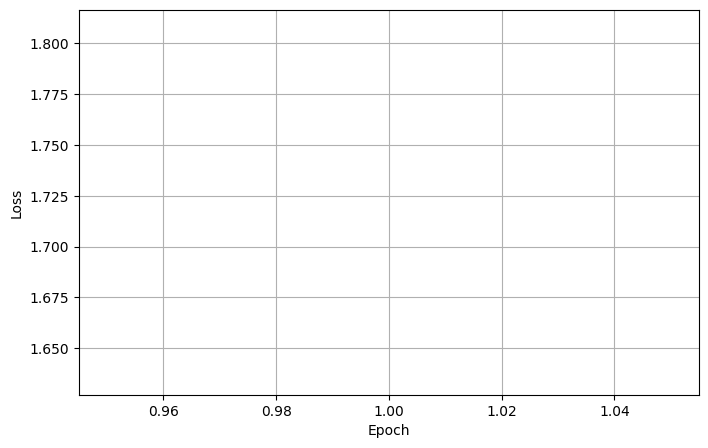

Best model saved with loss: 1.7218340836478736 to models/20250330_235929/best_model.pth
Epoch 1/500, Avg Loss: 1.7218340836478736
    Time left: 00:20:29
Best model saved with loss: 1.1427148802597176 to models/20250330_235929/best_model.pth
Epoch 2/500, Avg Loss: 1.1427148802597176
    Time left: 00:19:43
Best model saved with loss: 0.9654642290551102 to models/20250330_235929/best_model.pth
Epoch 3/500, Avg Loss: 0.9654642290551102
    Time left: 00:19:49
Best model saved with loss: 0.8682166584625278 to models/20250330_235929/best_model.pth
Epoch 4/500, Avg Loss: 0.8682166584625278
    Time left: 00:19:34
Best model saved with loss: 0.8057306033009044 to models/20250330_235929/best_model.pth
Epoch 5/500, Avg Loss: 0.8057306033009044
    Time left: 00:19:29
Best model saved with loss: 0.7574733108335594 to models/20250330_235929/best_model.pth
Epoch 6/500, Avg Loss: 0.7574733108335594
    Time left: 00:19:20
Best model saved with loss: 0.724101533367561 to models/20250330_235929/best

KeyboardInterrupt: 

In [ ]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data (for LSTM input)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])  # (Number of samples, Time steps, Features)    # actually no meaning
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])  # (Number of samples, Time steps, Features)         # actually no meaning

# Initialize the model
input_size = X_train.shape[2]  # Number of features
hidden_size = 64  # Number of hidden units in LSTM
output_size = len(input_data)  # Number of output classes (determined by the number of objects)
num_layers = 2  # Number of LSTM layers
LR = 0.0004  # Learning rate
BATCH_SIZE = 128  # Batch size

# Create PyTorch dataset
class TimeSeriesDataset(torch.utils.data.Dataset):
    def __init__(self, X, y, indices=None, file_paths=None):
        self.X = torch.tensor(X, dtype=torch.float32).to(device)  # Move to device (GPU or CPU)
        self.y = torch.tensor(y, dtype=torch.long).to(device)  # Move to device (GPU or CPU)
        self.indices = indices  # List of start indices
        self.file_paths = file_paths  # List of file paths

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx], self.indices[idx], self.file_paths[idx]  # Return index and file path as well

# Get index and file path information
train_indices = []
test_indices = []
train_file_paths = []
test_file_paths = []

for obj in input_data.keys():
    # Get the indices and file paths for each object
    train_indices.extend([x[1] for x in input_data[obj][:len(X_train)//len(input_data.keys())]])
    test_indices.extend([x[1] for x in input_data[obj][len(X_train)//len(input_data.keys()):]])
    train_file_paths.extend([x[2] for x in input_data[obj][:len(X_train)//len(input_data.keys())]])
    test_file_paths.extend([x[2] for x in input_data[obj][len(X_train)//len(input_data.keys()):]])

train_dataset = TimeSeriesDataset(X_train, y_train, train_indices, train_file_paths)
test_dataset = TimeSeriesDataset(X_test, y_test, test_indices, test_file_paths)

# Create DataLoader with batch size BATCH_SIZE
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Define the LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, (h_n, c_n) = self.lstm(x)
        out = self.fc(h_n[-1])
        return out

model = LSTMClassifier(input_size, hidden_size, output_size, num_layers).to(device)  # Move model to device (GPU or CPU)

# Loss function and optimization algorithm
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

# Initialize variables to track the best loss
best_loss = float('inf')

# Get current time to create a new folder for saving the models
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
model_dir = f"models/{current_time}"

# Create the directory if it does not exist
os.makedirs(model_dir, exist_ok=True)

losses = []
plt.ion()  # Interactive mode ON
fig, ax = plt.subplots(figsize=(8, 5))
# Training loop
time_train_start = time.time()
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for inputs, labels, indices, file_paths in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to device (GPU or CPU)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / len(train_loader)  # Calculate average loss for the epoch
    losses.append(avg_epoch_loss)
    
    # Plot loss
    ax.clear()
    ax.plot(range(1, len(losses) + 1), losses, linestyle='-')
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.grid()
    if epoch > 100:
        ax.set_ylim(0,0.1)
    plt.pause(0.1)  # Short pause to update the plot

    # Save model every 100 epochs
    if (epoch + 1) % 100 == 0:
        model_save_path = os.path.join(model_dir, f"model_epoch_{epoch+1}.pth")
        torch.save(model.state_dict(), model_save_path)
        print(f"Model saved at epoch {epoch+1} to {model_save_path}")

    # Save model if it has the lowest loss so far
    if avg_epoch_loss < best_loss:
        best_loss = avg_epoch_loss
        best_model_path = os.path.join(model_dir, "best_model.pth")
        torch.save(model.state_dict(), best_model_path)
        print(f"Best model saved with loss: {best_loss} to {best_model_path}")

    global_printer.print_green(f"Epoch {epoch+1}/{num_epochs}, Avg Loss: {avg_epoch_loss}")
    time_left = (time.time()-time_train_start) / (epoch+1) * (num_epochs - epoch - 1)
    print(f"    Time left: {time.strftime('%H:%M:%S', time.gmtime(time_left))}")

# Model evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels, indices, file_paths in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to device (GPU or CPU)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        for i in range(len(predicted)):
            predicted_label = predicted[i].item()
            actual_label = labels[i].item()
            print(f"Test Sample CSV: {file_paths[i]}, Start Index: {indices[i]}, Predicted: {predicted_label}, Actual: {actual_label}")

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')